### **An Illustration of the Impact of Phase Response using an Allpass System**

Prepared by Alper T. Erdogan for ELEC 301

$$H(s)=\frac{(s-p)}{(s+p)}$$

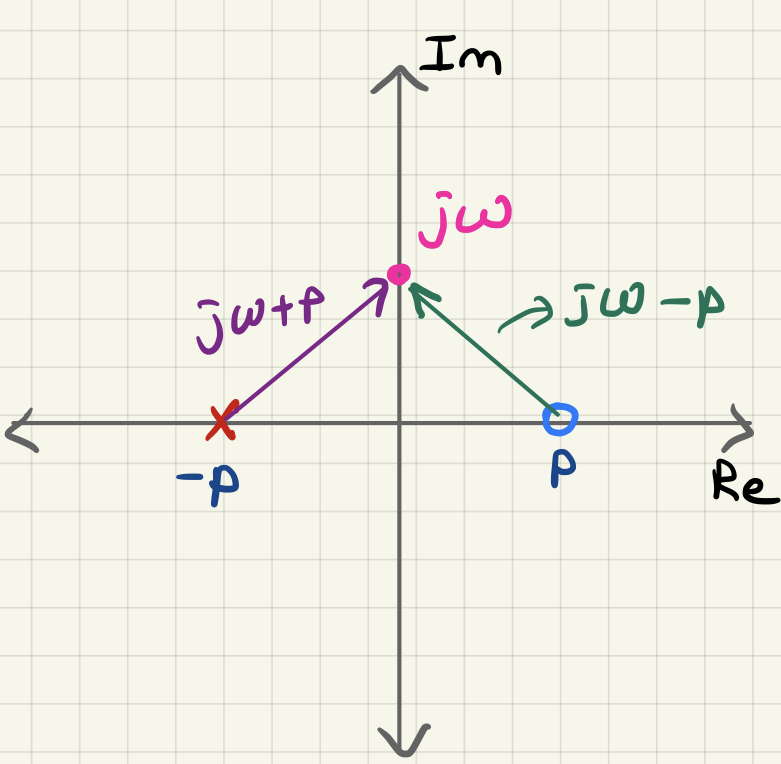



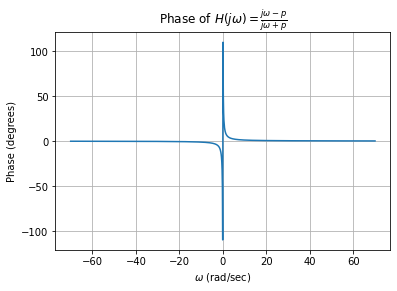

In [35]:
w=np.linspace(-70, 70, num=1000)
plt.plot(w,np.mod((np.pi-2*np.arctan(w/0.1)),2*np.pi)*180/np.pi-360*(w<0))
plt.grid()
plt.xlabel(r'$\omega$ (rad/sec)')
plt.ylabel('Phase (degrees)')
plt.title(r'Phase of $H(j\omega)=\frac{j\omega-p}{j\omega+p}$')
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, lsim,convolve

from google.colab import output
output.enable_custom_widget_manager()

#widget modules
from ipywidgets import interact, interactive
import ipywidgets as widgets

# Define individual cosine signals
def sine_signal(A, f, t):
    return A * np.sin(2 * np.pi * f * t)

A1, A2, A3,A4,A5 = 1, 1/3,1/5,1/7,1/9
f1, f2, f3,f4,f5 = 1, 3, 5,7,9

# Define input signal as the sum of 3 cosine signals
def input_signal(t):
    return sine_signal(A1, f1, t) + sine_signal(A2, f2, t) + sine_signal(A3, f3, t) + sine_signal(A4, f4, t)+ sine_signal(A5, f5, t)



def update_plot(p):
  #Define LTI System H(s)=(s+p)(s+p)/(s-p)(s-p)
  #numerator = convolve([1,-p],[1,-p])
  #denominator =convolve([1,p],[1,p])
  numerator=[1,-p]
  denominator=[1,p]
  system = lti(numerator, denominator)
  w, mag, phase = system.bode(w=np.linspace(6, 70, num=1000))

  # Time vector for simulation
  tt = np.linspace(0, 12, num=1000)

  # Compute the response of the LTI system to the input signal and its components
  _, y, _ = lsim(system, input_signal(tt), tt)
  _, y1, _ = lsim(system, sine_signal(A1, f1, tt), tt)
  _, y2, _ = lsim(system, sine_signal(A2, f2, tt), tt)
  _, y3, _ = lsim(system, sine_signal(A3, f3, tt), tt)
  _, y4, _ = lsim(system, sine_signal(A4, f4, tt), tt)

  plt.figure(figsize=(12, 4), dpi=80)
  plt.tight_layout()
  plt.subplot(1,2,1)
  plt.plot(w/2/np.pi,mag)
  plt.ylabel('Magnitude(dB)')
  plt.xlabel('Frequency (Hz)')
  plt.title('Magnitude Response')
  plt.grid()
  plt.axis([1,3,-2,2])
  plt.subplot(1,2,2)
  plt.plot(w/2/np.pi,phase)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Degrees')
  plt.title('Phase Response')
  plt.axis([1,10,-90,90])
  plt.grid()
  st=800
  t=tt[st:]
  mm=1.7
  # Plot input signal and its components
  plt.figure(figsize=(12, 4), dpi=80)
  plt.tight_layout()
  plt.subplot(1,2,1)
  plt.plot(t, input_signal(t),linewidth=2)
  plt.plot(t, sine_signal(A1, f1, t),'--')
  plt.plot(t, sine_signal(A2, f2, t),'--')
  plt.plot(t, sine_signal(A3, f3, t),'--')
  plt.title('Input Signal and Components')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.axis([9.5,12,-mm,mm])
  plt.grid()

  # Plot output signal and responses of the components
  plt.subplot(1,2,2)
  plt.plot(t, y[st:], linewidth=2)
  plt.plot(t, y1[st:], linestyle='--')
  plt.plot(t, y2[st:], linestyle='--')
  plt.plot(t, y3[st:], linestyle='--')
  plt.title('Output Signal and Responses of Components')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.axis([9.5,12,-mm,mm])
  plt.grid()

  # Display plots
  plt.show()


interactive_plot = interactive(update_plot,p=(0.01,2.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=1.005, description='p', max=2.0, min=0.01), Output()), _dom_classes=('…